In [1]:
score_max = 1 + 1e-6
score_bins = np.linspace(0,score_max,101)
pt_bins = np.linspace(0,300,101)

In [5]:
signal = Signal(get_NMSSM(700,400,jets='cutflow_studies/presel'))
signal.nevents

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/presel/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


55952

In [6]:
signal.cutflow

array([17922, 12611, 10180, 10180])

In [8]:
btag_order = ak.sort(signal.jet_btag, axis=1, ascending=False)
pt_order = ak.sort(signal.jet_ptRegressed, axis=1, ascending=False)

In [9]:
from utils.analysis.tree import Tree

In [11]:
bkg = Tree(get_qcd_ttbar('cutflow_studies/presel', enriched=True))

In [6]:
# qcd = Tree(get_qcd_list('dnn'))
# ttb = Tree(get_ttbar('dnn'))

In [12]:
def get_kin_at_index(sample, key, ind, bins):
    n_arr = []
    for tree, scale in zip(sample.tree, sample.scale):
        n, e = np.histogram(ak.sort(tree[key].array(), axis=1, ascending=False)[:,ind].to_numpy(), bins=bins)
        n_arr.append(n*scale)

    n_arr = np.row_stack(n_arr)
    n_arr = n_arr.sum(axis=0)
    return n_arr

In [13]:
# jets sorted by btag and separated into ith jet index

n_btag_1 = get_kin_at_index(bkg, 'jet_btag', 0, score_bins)
n_btag_2 = get_kin_at_index(bkg, 'jet_btag', 1, score_bins)
n_btag_3 = get_kin_at_index(bkg, 'jet_btag', 2, score_bins)
n_btag_4 = get_kin_at_index(bkg, 'jet_btag', 3, score_bins)
n_btag_5 = get_kin_at_index(bkg, 'jet_btag', 4, score_bins)
n_btag_6 = get_kin_at_index(bkg, 'jet_btag', 5, score_bins)

n_pt_1 = get_kin_at_index(bkg, 'jet_ptRegressed', 0, pt_bins)
n_pt_2 = get_kin_at_index(bkg, 'jet_ptRegressed', 1, pt_bins)
n_pt_3 = get_kin_at_index(bkg, 'jet_ptRegressed', 2, pt_bins)
n_pt_4 = get_kin_at_index(bkg, 'jet_ptRegressed', 3, pt_bins)
n_pt_5 = get_kin_at_index(bkg, 'jet_ptRegressed', 4, pt_bins)
n_pt_6 = get_kin_at_index(bkg, 'jet_ptRegressed', 5, pt_bins)

bkg_btag = [n_btag_1, n_btag_2, n_btag_3, n_btag_4, n_btag_5, n_btag_6]
bkg_pt = [n_pt_1, n_pt_2, n_pt_3, n_pt_4, n_pt_5, n_pt_6]

In [9]:
ttb_pt = ak.sort(ttb.jet_ptRegressed, axis=1, ascending=False)
ttb_btag = ak.sort(ttb.jet_btag, axis=1, ascending=False)

In [63]:
# jets sorted by btag and separated into ith jet index

n_btag_1_qcd = get_kin_at_index(qcd, 'jet_btag', 0, score_bins)
n_btag_2_qcd = get_kin_at_index(qcd, 'jet_btag', 1, score_bins)
n_btag_3_qcd = get_kin_at_index(qcd, 'jet_btag', 2, score_bins)
n_btag_4_qcd = get_kin_at_index(qcd, 'jet_btag', 3, score_bins)
n_btag_5_qcd = get_kin_at_index(qcd, 'jet_btag', 4, score_bins)
n_btag_6_qcd = get_kin_at_index(qcd, 'jet_btag', 5, score_bins)

n_pt_1_qcd = get_kin_at_index(qcd, 'jet_ptRegressed', 0, pt_bins)
n_pt_2_qcd = get_kin_at_index(qcd, 'jet_ptRegressed', 1, pt_bins)
n_pt_3_qcd = get_kin_at_index(qcd, 'jet_ptRegressed', 2, pt_bins)
n_pt_4_qcd = get_kin_at_index(qcd, 'jet_ptRegressed', 3, pt_bins)
n_pt_5_qcd = get_kin_at_index(qcd, 'jet_ptRegressed', 4, pt_bins)
n_pt_6_qcd = get_kin_at_index(qcd, 'jet_ptRegressed', 5, pt_bins)

qcd_btag = [n_btag_1_qcd, n_btag_2_qcd, n_btag_3_qcd, n_btag_4_qcd, n_btag_5_qcd, n_btag_6_qcd]

In [210]:
print(round(n_btag_1_qcd[score_bins[:-1] > jet_btagWP[3]].sum()/n_btag_1_qcd.sum()*100))
print(round(n_btag_2_qcd[score_bins[:-1] > jet_btagWP[3]].sum()/n_btag_1_qcd.sum()*100))
print(round(n_btag_3_qcd[score_bins[:-1] > jet_btagWP[3]].sum()/n_btag_1_qcd.sum()*100))
print(round(n_btag_3_qcd[score_bins[:-1] > jet_btagWP[2]].sum()/n_btag_1_qcd.sum()*100))

87
47
9
27


In [213]:
print(round(ak.sum(ttb_btag[:,0] > jet_btagWP[3]) / len(ttb_btag)*100))
print(round(ak.sum(ttb_btag[:,1] > jet_btagWP[3]) / len(ttb_btag)*100))
print(round(ak.sum(ttb_btag[:,2] > jet_btagWP[3]) / len(ttb_btag)*100))
print(round(ak.sum(ttb_btag[:,2] > jet_btagWP[2]) / len(ttb_btag)*100))

94
61
9
36


In [11]:
jet_btagWP = [0,0.0490,0.2783,0.7100]

In [15]:
tight_eff_height = [
    int(n_btag_1[score_bins[:-1] > jet_btagWP[-1]].sum()/n_btag_1.sum()*100),
    int(n_btag_2[score_bins[:-1] > jet_btagWP[-1]].sum()/n_btag_1.sum()*100),
    int(n_btag_3[score_bins[:-1] > jet_btagWP[-1]].sum()/n_btag_1.sum()*100),
    int(n_btag_4[score_bins[:-1] > jet_btagWP[-1]].sum()/n_btag_1.sum()*100),
    int(n_btag_5[score_bins[:-1] > jet_btagWP[-1]].sum()/n_btag_1.sum()*100),
    int(n_btag_6[score_bins[:-1] > jet_btagWP[-1]].sum()/n_btag_1.sum()*100),
]
tight_eff_height[1]

med_eff_height = [
    int(n_btag_1[score_bins[:-1] > jet_btagWP[-2]].sum()/n_btag_1.sum()*100),
    int(n_btag_2[score_bins[:-1] > jet_btagWP[-2]].sum()/n_btag_1.sum()*100),
    int(n_btag_3[score_bins[:-1] > jet_btagWP[-2]].sum()/n_btag_1.sum()*100),
    int(n_btag_4[score_bins[:-1] > jet_btagWP[-2]].sum()/n_btag_1.sum()*100),
    int(n_btag_5[score_bins[:-1] > jet_btagWP[-2]].sum()/n_btag_1.sum()*100),
    int(n_btag_6[score_bins[:-1] > jet_btagWP[-2]].sum()/n_btag_1.sum()*100),
]
med_eff_height[1]

loose_eff_height = [
    int(n_btag_1[score_bins[:-1] > jet_btagWP[1]].sum()/n_btag_1.sum()*100),
    int(n_btag_2[score_bins[:-1] > jet_btagWP[1]].sum()/n_btag_1.sum()*100),
    int(n_btag_3[score_bins[:-1] > jet_btagWP[1]].sum()/n_btag_1.sum()*100),
    int(n_btag_4[score_bins[:-1] > jet_btagWP[1]].sum()/n_btag_1.sum()*100),
    int(n_btag_5[score_bins[:-1] > jet_btagWP[1]].sum()/n_btag_1.sum()*100),
    int(n_btag_6[score_bins[:-1] > jet_btagWP[1]].sum()/n_btag_1.sum()*100),
]
loose_eff_height[1]

99

In [16]:
tight_eff_height, med_eff_height, loose_eff_height

([94, 66, 18, 3, 0, 0], [99, 89, 43, 10, 0, 0], [99, 99, 81, 39, 10, 1])

In [14]:
x_label = [f'Jet {i}' for i in range(1,7)]
ticks = np.arange(6)

In [17]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

In [18]:
from utils.cutConfig import *

In [19]:
jet_op = ['Fail', 'Loose', 'Medium', 'Tight']

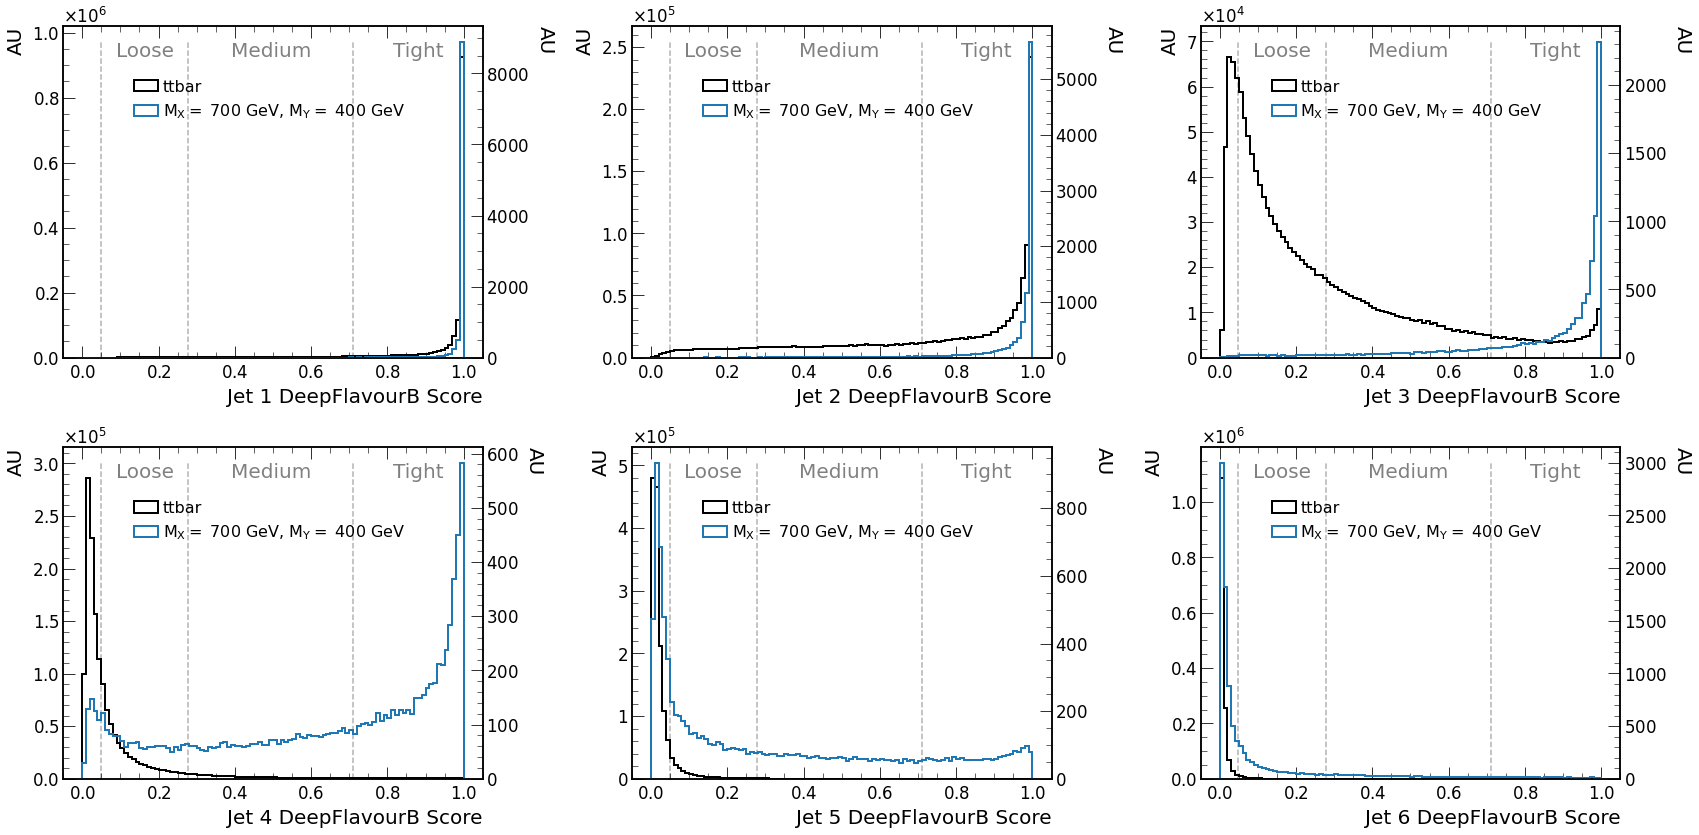

In [95]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,12))

for i,ax in enumerate(axs.flatten()):
    ax_sig = ax.twinx()
    _ = Hist(ttb_btag[:,i], bins=score_bins, ax=ax, color='k', zorder=2, weights=ttb.scale, label='ttbar')
    signal.hist(btag_order[:,i], bins=score_bins, ax=ax_sig, color=f'C0', label=signal.sample, title=False)
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    # ax.set_title(r'MC $t\bar{t}$')
    ax.set_xlabel(f'Jet {i+1} DeepFlavourB Score')
    ax.set_ylabel('AU')
    ax_sig.set_ylabel('AU', rotation=270, ha='left', va='bottom')

    for j in range(1,4):
        try: x = np.average((jet_btagWP[j], jet_btagWP[j+1]))
        except: x = np.average((jet_btagWP[j], xlims[1]))

        ax.plot([jet_btagWP[j]]*2, ylims, color='k', ls='--', alpha=.3, zorder=1)
        ax.text(x, ylims[1], f'{jet_op[j]}', ha='center', va='top', color='gray')

    ax.ticklabel_format(axis='y', style='sci', scilimits=[-3,3])
    ax.legend(loc=(0.15,0.77))
    ax_sig.legend(loc=(0.15,0.69))

plt.tight_layout()

fig.savefig('plots/3_hlo_reconstruction/ttb_signal_btag_six.pdf')

In [19]:
qcd_btag = [n_btag_1_qcd, n_btag_2_qcd, n_btag_3_qcd, n_btag_4_qcd, n_btag_5_qcd, n_btag_6_qcd]

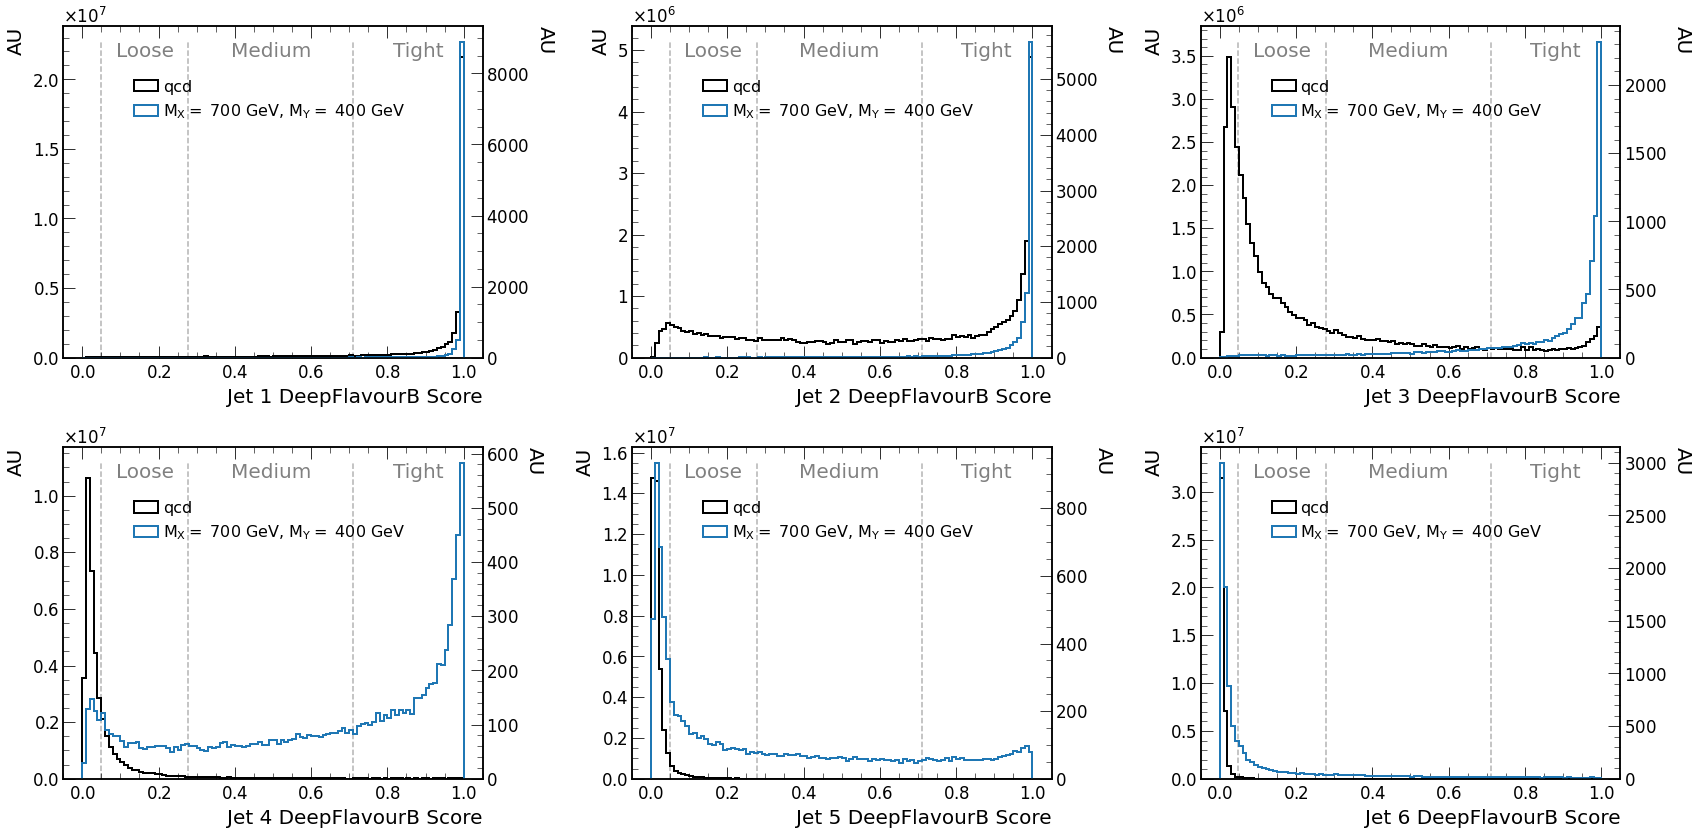

In [99]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,12))

for i,ax in enumerate(axs.flatten()):
    ax_sig = ax.twinx()
    _ = Hist(score_bins[:-1], weights=qcd_btag[i], bins=score_bins, ax=ax, density=False, color='k', zorder=2, label='qcd')
    signal.hist(btag_order[:,i], bins=score_bins, ax=ax_sig, color=f'C0', label=signal.sample, title=False)
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    # ax.set_title(r'MC QCD')
    ax.set_xlabel(f'Jet {i+1} DeepFlavourB Score')
    ax.set_ylabel('AU')
    ax_sig.set_ylabel('AU', rotation=270, ha='left', va='bottom')

    for j in range(1,4):
        try: x = np.average((jet_btagWP[j], jet_btagWP[j+1]))
        except: x = np.average((jet_btagWP[j], xlims[1]))

        ax.plot([jet_btagWP[j]]*2, ylims, color='k', ls='--', alpha=.3, zorder=1)
        ax.text(x, ylims[1], f'{jet_op[j]}', ha='center', va='top', color='gray')
        # break
    # break
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_2, ax=ax, density=False)
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_3, ax=ax, density=False)
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_4, ax=ax, density=False)
    ax.ticklabel_format(axis='y', style='sci', scilimits=[-3,3])

    ax.legend(loc=(0.15,0.77))
    ax_sig.legend(loc=(0.15,0.69))

    # ax.yaxis.set_major_formatter(formatter) 

plt.tight_layout()
# fig, ax = plt.subplots()
# ttb.hist()

fig.savefig('plots/3_hlo_reconstruction/qcd_signal_btag_six.pdf')

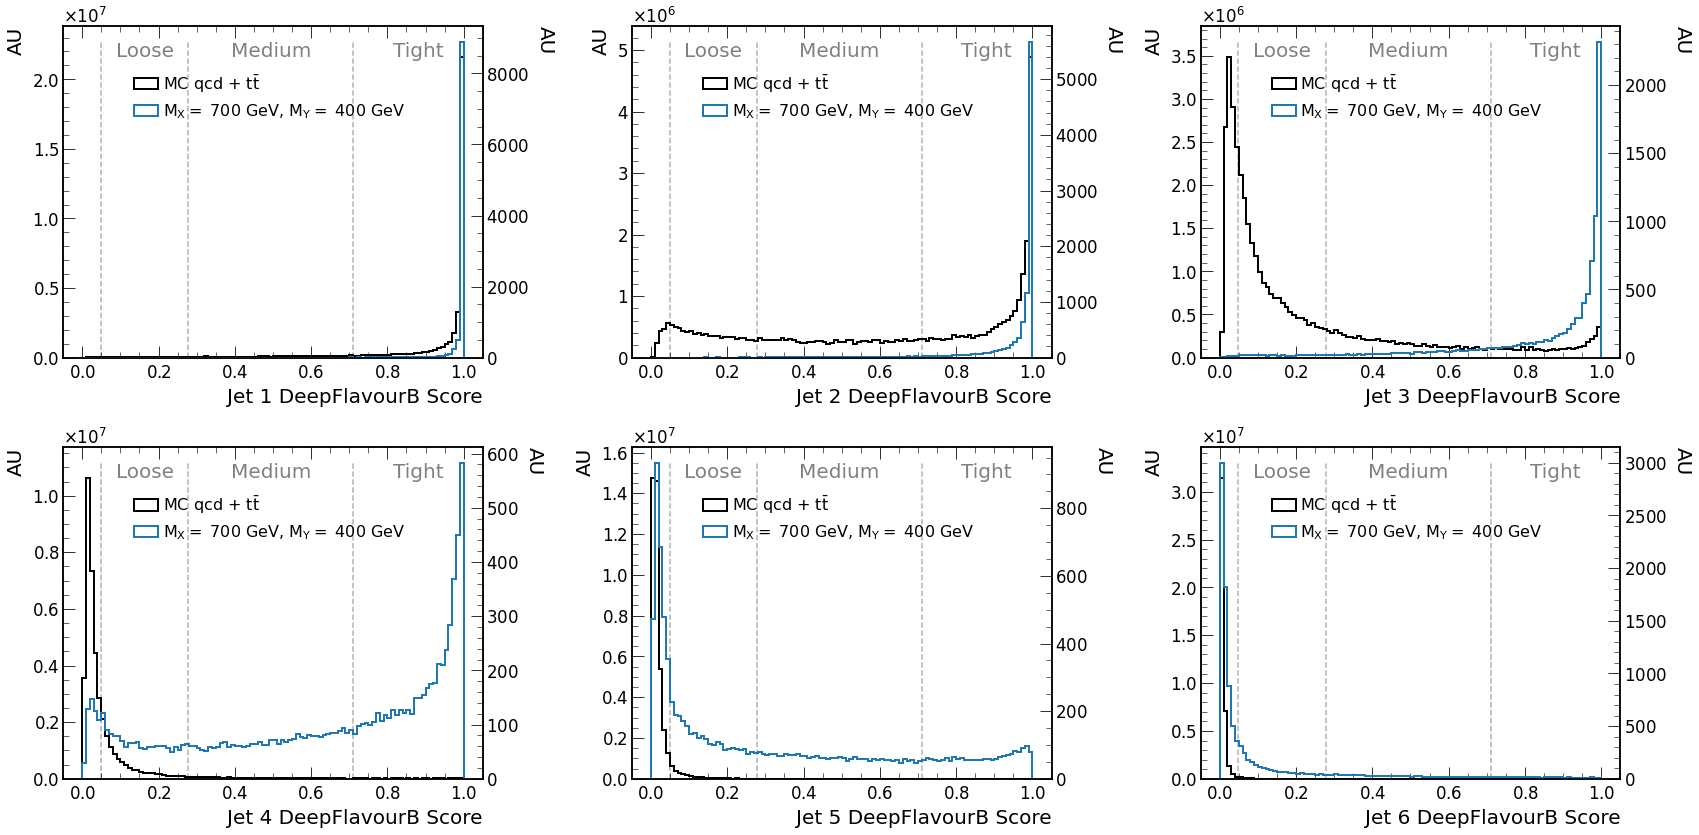

In [100]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,12))

for i,ax in enumerate(axs.flatten()):
    ax_sig = ax.twinx()
    _ = Hist(score_bins[:-1], weights=bkg_btag[i], bins=score_bins, ax=ax, density=False, color='k', zorder=2, label=r'MC qcd + t$\bar{t}$')
    signal.hist(btag_order[:,i], bins=score_bins, ax=ax_sig, color=f'C0', label=signal.sample, title=False)
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    # ax.set_title(r'MC QCD')
    ax.set_xlabel(f'Jet {i+1} DeepFlavourB Score')
    ax.set_ylabel('AU')
    ax_sig.set_ylabel('AU', rotation=270, ha='left', va='bottom')

    for j in range(1,4):
        try: x = np.average((jet_btagWP[j], jet_btagWP[j+1]))
        except: x = np.average((jet_btagWP[j], xlims[1]))

        ax.plot([jet_btagWP[j]]*2, ylims, color='k', ls='--', alpha=.3, zorder=1)
        ax.text(x, ylims[1], f'{jet_op[j]}', ha='center', va='top', color='gray')
        # break
    # break
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_2, ax=ax, density=False)
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_3, ax=ax, density=False)
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_4, ax=ax, density=False)
    ax.ticklabel_format(axis='y', style='sci', scilimits=[-3,3])

    ax.legend(loc=(0.15,0.77))
    ax_sig.legend(loc=(0.15,0.69))

    # ax.yaxis.set_major_formatter(formatter) 

plt.tight_layout()
# fig, ax = plt.subplots()
# ttb.hist()

fig.savefig('plots/3_hlo_reconstruction/qcd_ttbar_signal_btag_six.pdf')

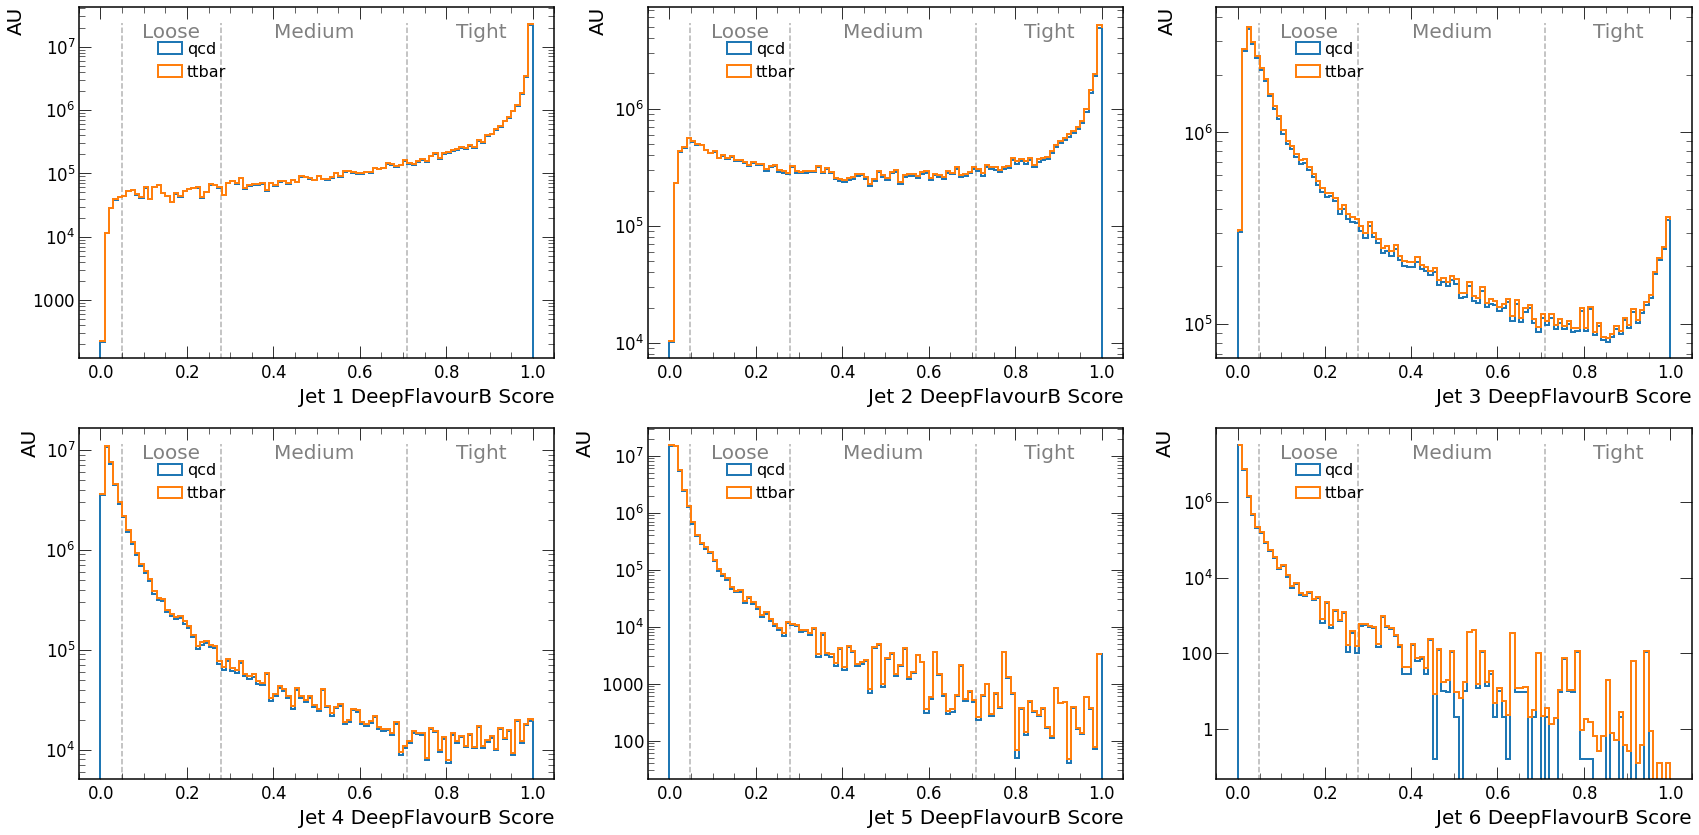

In [101]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,12))

for i,ax in enumerate(axs.flatten()):
    _ = Hist(score_bins[:-1], weights=qcd_btag[i], bins=score_bins, ax=ax, density=False, color=f'C0', zorder=2, label='qcd')
    n = Hist(ttb_btag[:,i], bins=score_bins, ax=ax, color='C1', zorder=2, label='ttbar', weights=ttb.scale, bottom=qcd_btag[i])
    # _ = Hist(btag_order[:,i], bins=score_bins, ax=ax, color=f'C{i}', label=signal.sample)
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    # ax.set_title(r'MC $t\bar{t}$')
    ax.set_xlabel(f'Jet {i+1} DeepFlavourB Score')
    ax.set_ylabel('AU')
    ax.set_yscale('log')

    for j in range(1,4):
        try: x = np.average((jet_btagWP[j], jet_btagWP[j+1]))
        except: x = np.average((jet_btagWP[j], xlims[1]))

        ax.plot([jet_btagWP[j]]*2, ylims, color='k', ls='--', alpha=.3, zorder=1)
        ax.text(x, ylims[1], f'{jet_op[j]}', ha='center', va='top', color='gray')
        # break
    # break
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_2, ax=ax, density=False)
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_3, ax=ax, density=False)
# _ = Hist(score_bins[:-1], bins=score_bins, weights=n_btag_4, ax=ax, density=False)
    # ax.ticklabel_format(axis='y', style='sci', scilimits=[-3,3])

    ax.legend(loc=(0.15,0.77))
    # if i < 2: ax.legend(loc=2)

    # ax.yaxis.set_major_formatter(formatter) 

plt.tight_layout()
# fig, ax = plt.subplots()
# ttb.hist()

fig.savefig('plots/3_hlo_reconstruction/ttb_btag_six.pdf')
# fig.savefig('plots/3_hlo_reconstruction/ttb_btag_six_log.pdf')

In [65]:
qcd_pt = [n_pt_1_qcd, n_pt_2_qcd, n_pt_3_qcd, n_pt_4_qcd, n_pt_5_qcd, n_pt_6_qcd]

In [129]:
ak.min(qcd.tree[4]['jet_pt'].array())

20.000195

In [126]:
bkg_pt[0][:20], pt_bins[:20]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.19157091e-05, 0.00000000e+00, 7.19157091e-05,
        7.19157091e-04, 1.62183950e+03, 1.62193850e+03, 6.26388048e+01]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
        39., 42., 45., 48., 51., 54., 57.]))

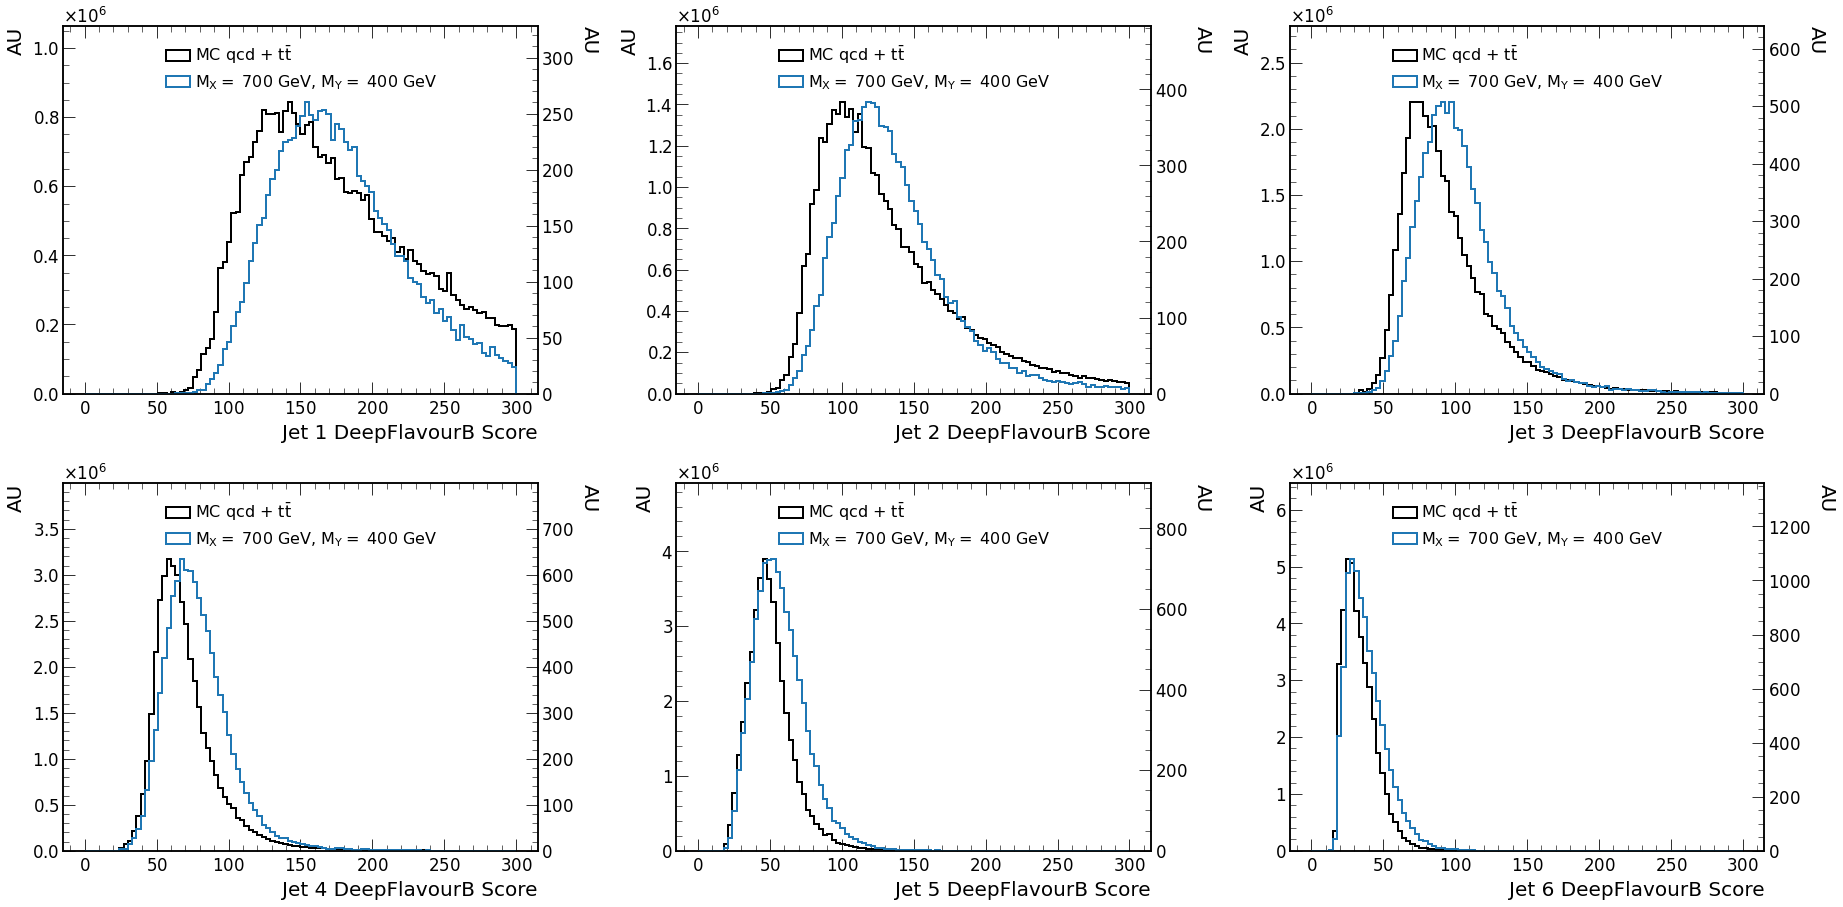

In [116]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(26,13))

for i,ax in enumerate(axs.flatten()):
    ax_sig = ax.twinx()
    _ = Hist(pt_bins[:-1], weights=bkg_pt[i], bins=pt_bins, ax=ax, density=False, color='k', zorder=2, label=r'MC qcd + t$\bar{t}$')
    signal.hist(pt_order[:,i], bins=pt_bins, ax=ax_sig, color=f'C0', label=signal.sample, title=False)
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    ylims_sig = ax_sig.get_ylim()
    ax.set_ylim(ylims[0], ylims[1]*1.2)
    ax_sig.set_ylim(ylims_sig[0], ylims_sig[1]*1.2)
    # ax.set_title(r'MC QCD')
    ax.set_xlabel(f'Jet {i+1} DeepFlavourB Score')
    ax.set_ylabel('AU')
    ax_sig.set_ylabel('AU', rotation=270, ha='left', va='bottom')

    ax.ticklabel_format(axis='y', style='sci', scilimits=[-3,3])

    ax.legend(loc=(0.2,0.87))
    ax_sig.legend(loc=(0.2,0.80))

    # ax.yaxis.set_major_formatter(formatter) 

plt.tight_layout()
# fig, ax = plt.subplots()
# ttb.hist()

fig.savefig('plots/3_hlo_reconstruction/qcd_ttbar_signal_pt_six.pdf')

In [32]:
qcd.scale

array([1.86406918e+03, 2.60255677e+02, 8.86679273e+01, 9.60683031e+00,
       9.60484013e+00, 2.09229090e+00, 1.55271391e-01, 9.73436346e-02,
       3.93201435e+04, 6.21913888e+03, 1.62183756e+03, 3.49642828e+02,
       1.10774858e+02, 6.26295276e+01, 2.28302060e+01, 8.55304142e+00])

In [31]:
qcd.tree[0]['b_6j_score'].array()

<Array [6.21e-05, 0.0172, ... 0.000894, 0.0741] type='9 * float32'>

(25,) [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98557728e+07 1.22390259e+07
 5.73175817e+06 2.14728560e+06 7.27425931e+05 2.09294329e+05
 5.46197523e+04 1.86242235e+04 4.77464209e+03 1.59335461e+03
 2.04842308e+02 1.73638696e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


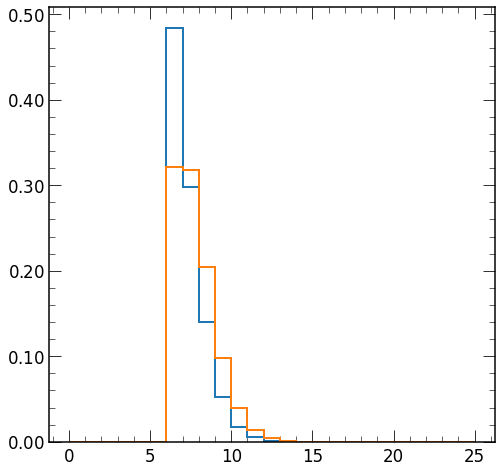

In [10]:
fig, ax = plt.subplots()

n_arr = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n, e = np.histogram(tree['n_jet'].array(library='np'), bins=np.arange(26))
    n_arr.append(n*scale)

n_arr = np.row_stack(n_arr)
n_arr = n_arr.sum(axis=0)
print(n_arr.shape, n_arr)

_ = Hist(x_bins(np.arange(26)), weights=n_arr, bins=np.arange(26), ax=ax)
_ = Hist(signal.n_jet, bins=np.arange(26), ax=ax)

In [228]:
upper = 1 + 1e-6

In [229]:
score_bins = np.linspace(0,upper,42)
score_bins

array([0.        , 0.02439027, 0.04878054, 0.0731708 , 0.09756107,
       0.12195134, 0.14634161, 0.17073188, 0.19512215, 0.21951241,
       0.24390268, 0.26829295, 0.29268322, 0.31707349, 0.34146376,
       0.36585402, 0.39024429, 0.41463456, 0.43902483, 0.4634151 ,
       0.48780537, 0.51219563, 0.5365859 , 0.56097617, 0.58536644,
       0.60975671, 0.63414698, 0.65853724, 0.68292751, 0.70731778,
       0.73170805, 0.75609832, 0.78048859, 0.80487885, 0.82926912,
       0.85365939, 0.87804966, 0.90243993, 0.9268302 , 0.95122046,
       0.97561073, 1.000001  ])

In [230]:
x_bins(score_bins).shape, score_bins.shape, n_arr.shape

((41,), (42,), (41,))

(41,) [28853189.61330866  1903882.61223491  1032238.26528995   685777.6442169
   511209.70148302   405983.54198803   353303.55230718   331830.32054629
   272581.12127743   263698.64448779   229619.47303359   219230.47750104
   213344.03521225   210600.60982077   159976.44743867   167790.31893959
   159401.66506549   138377.79022308   158767.90591102   132429.4296133
   152288.49418322   138757.43041525   139943.05326035   137412.6245405
   126178.9020918    133555.60524237   128777.88811214   115895.51736398
   143217.82685317   127517.34264575   139714.99804025   146709.75786633
   154743.02310974   174829.00877713   161547.92780573   190677.04733786
   227004.23383186   217365.75700225   294586.7981128    372592.36645033
  1164004.38774303]


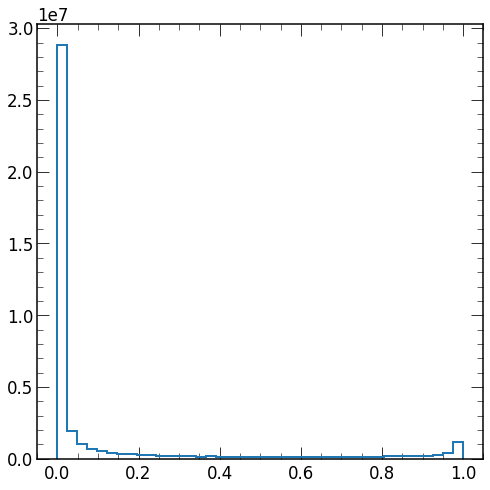

In [231]:
fig, ax = plt.subplots()

n_arr = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n, e = np.histogram(tree['b_6j_score'].array(library='np'), bins=score_bins)
    n_arr.append(n*scale)

n_arr = np.row_stack(n_arr)
n_arr = n_arr.sum(axis=0)
print(n_arr.shape, n_arr)

_ = Hist(x_bins(score_bins), weights=n_arr, bins=score_bins, ax=ax, density=False)

In [232]:
signal_ratio_pass = []
for s in score_bins:
    signal_ratio_pass.append((signal.evt_score > s).to_numpy().sum() / len(signal.evt_score))

signal_ratio_pass = np.asarray(signal_ratio_pass)
bkg_ratio_fail = np.append(np.array((0)), n_arr[::-1].cumsum()/n_arr.sum())

In [234]:
signal_ratio_pass, bkg_ratio_fail

(array([1.        , 0.75280156, 0.71787814, 0.69619846, 0.67907633,
        0.6662258 , 0.65493021, 0.6446891 , 0.63585995, 0.62787082,
        0.62082894, 0.6146807 , 0.60853247, 0.60191954, 0.59612876,
        0.59073118, 0.58517274, 0.57952494, 0.57418098, 0.56885489,
        0.56347518, 0.55805973, 0.55280513, 0.54738968, 0.54147379,
        0.53579025, 0.52974924, 0.52402995, 0.51811406, 0.51216243,
        0.50546013, 0.49886508, 0.49200193, 0.48451323, 0.47647048,
        0.46710515, 0.45652446, 0.44415649, 0.42889314, 0.40835731,
        0.37582885, 0.        ]),
 array([0.        , 0.02839689, 0.03748661, 0.04467331, 0.04997613,
        0.0555141 , 0.06016583, 0.06410693, 0.06837203, 0.07214712,
        0.07572624, 0.0791347 , 0.0822456 , 0.08573952, 0.08856689,
        0.09170854, 0.09496675, 0.09804499, 0.10139729, 0.10481132,
        0.10819643, 0.11191164, 0.11514237, 0.11901565, 0.1223915 ,
        0.12628024, 0.13037363, 0.13427639, 0.13941418, 0.14461889,
        0.1499

[]

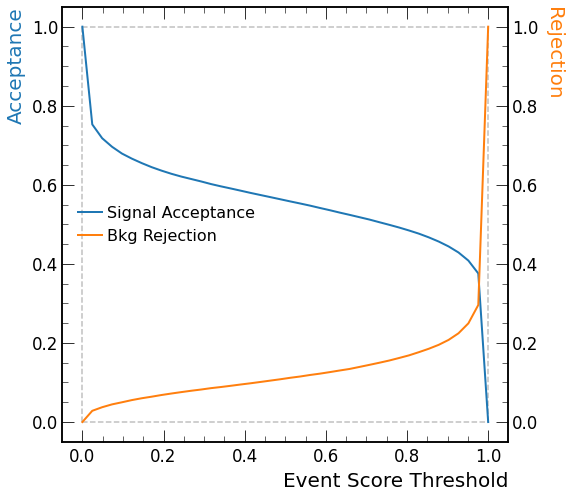

In [246]:
fig, ax = plt.subplots()

ax.plot([0,1], [0,0], color='gray', ls='--', alpha=0.5)
ax.plot([0,0], [0,1], color='gray', ls='--', alpha=0.5)
ax.plot([0,1], [1,1], color='gray', ls='--', alpha=0.5)
ax.plot([1,1], [0,1], color='gray', ls='--', alpha=0.5)

ax.plot(score_bins, signal_ratio_pass, label='Signal Acceptance', lw=2)
ax.plot(score_bins, bkg_ratio_fail, label='Bkg Rejection', lw=2)

ax_secondary = ax.twinx()

ax.set_xlabel('Event Score Threshold')

ax.set_ylabel('Acceptance', color='C0')
ax_secondary.set_ylabel('Rejection', color='C1', rotation=270, va='bottom', ha='left', y=1)#, rotation_mode='anchor', ha='right')

min_lim = -0.05
max_lim = 1.05

ax_secondary.set_xlim(min_lim, max_lim)
ax_secondary.set_ylim(min_lim, max_lim)
ax.set_xlim(min_lim, max_lim)
ax.set_ylim(min_lim, max_lim)

# ax.plot([score_bins[-2]]*2, [0,1])
ax.legend()

ax.plot()

In [257]:
score_masks = []

n_pass = []
n_all = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n_pass.append((tree['b_6j_score'].array() > score_bins[-2]).to_numpy().sum()*scale)
    n_all.append((tree['b_6j_score'].array() > 0).to_numpy().sum()*scale)

n_pass = np.asarray(n_pass)
n_all = np.asarray(n_all)
# score_bins[-2]

In [258]:
n_pass.sum() / n_all.sum()

0.02839689386918209

In [260]:
(signal.evt_score > score_bins[-2]).to_numpy().sum() / len(signal.evt_score)

0.37582885024396345

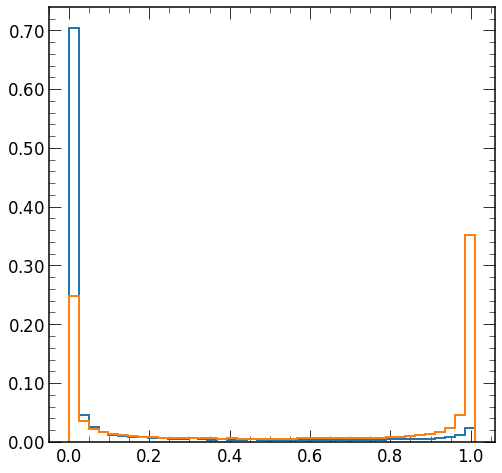

In [96]:
fig, ax = plt.subplots()

n_arr = []
for tree, scale in zip(qcd.tree, qcd.scale):
    n, e = np.histogram(tree['b_6j_score'].array(library='np'), bins=score_bins)
    n_arr.append(n*scale)

n_arr = np.row_stack(n_arr)
n_arr = n_arr.sum(axis=0)

_ = Hist(x_bins(score_bins), weights=n_arr, bins=score_bins, ax=ax)
_ = Hist(signal.get('b_6j_score'), bins=score_bins, ax=ax)

In [219]:
ak.all(signal.HX_b1_pt Regressed >= signal.HX_b2_ptRegressed)

False

In [99]:
signal.nfound_presel, signal.nfound_select, signal.nfound

(<Array [6, 4, 5, 6, 6, 6, ... 6, 6, 6, 5, 5, 5] type='55951 * int32'>,
 <Array [6, 4, 4, 6, 5, 6, ... 6, 6, 4, 5, 5, 5] type='55951 * int32'>)

In [111]:
signal.evt_score

<Array [1, 0.0152, 1, ... 0.129, 0.0808] type='55951 * float32'>

In [115]:
HX_found = (signal.HX_b1_genHflag == 0) | (signal.HX_b2_genHflag == 0)
H1_found = (signal.H1_b1_genHflag == 0) | (signal.H1_b2_genHflag == 0)
H2_found = (signal.H2_b1_genHflag == 0) | (signal.H2_b2_genHflag == 0)

array([   0.        ,    5.09457868,   83.33275127,  657.56454822,
       2675.38160406, 4496.87543147, 2261.99293401])

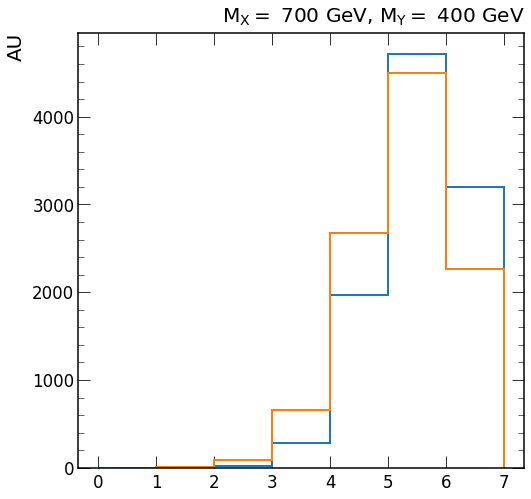

In [109]:
fig, ax = plt.subplots()

# n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

signal.hist('nfound_presel', bins=np.arange(8), ax=ax)
signal.hist('nfound_select', bins=np.arange(8), ax=ax)
# signal.hist('nfound_paired', bins=np.arange(8), ax=ax)

# ax.minorticks_off()

# ax.set_xlabel('BFH in Preselected Jets')
# ax.set_ylabel('BFH in Selected Jets')

# fig.colorbar(im, ax=ax)

array([0.00000000e+00, 0.00000000e+00, 7.27796954e-01, 1.16447513e+01,
       1.31367350e+02, 7.91115289e+02, 2.26199293e+03])

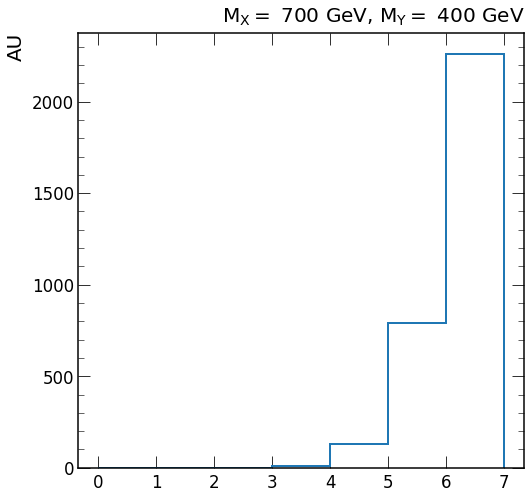

In [122]:
fig, ax = plt.subplots()

# n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

signal.hist(signal.nfound_select[signal.nfound_presel == 6], bins=np.arange(8), ax=ax)
# signal.hist('nfound_paired', bins=np.arange(8), ax=ax)

# ax.minorticks_off()

# ax.set_xlabel('BFH in Preselected Jets')
# ax.set_ylabel('BFH in Selected Jets')

# fig.colorbar(im, ax=ax)

array([ 233.98672081,  604.98121827,    0.        , 1423.02499492])

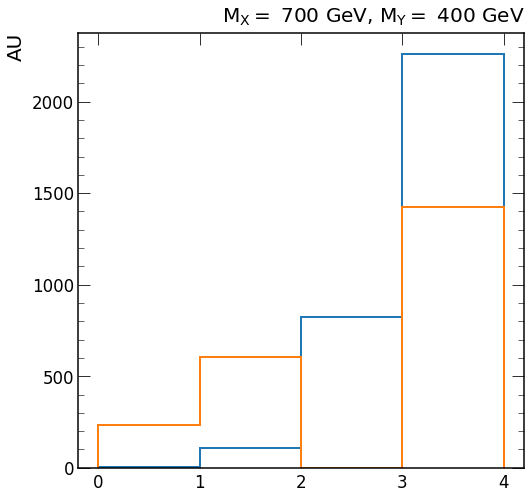

In [128]:
fig, ax = plt.subplots()

# n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

signal.hist(signal.nfound_select_h[signal.nfound_presel_h == 3], bins=np.arange(5), ax=ax)
# signal.hist(signal.nfound_paired_h[signal.nfound_presel_h == 3], bins=np.arange(5), ax=ax)
signal.hist(signal.nfound_paired_h[signal.nfound_select_h == 3], bins=np.arange(5), ax=ax)
# signal.hist('nfound_paired', bins=np.arange(8), ax=ax)

# ax.minorticks_off()

# ax.set_xlabel('BFH in Preselected Jets')
# ax.set_ylabel('BFH in Selected Jets')

# fig.colorbar(im, ax=ax)

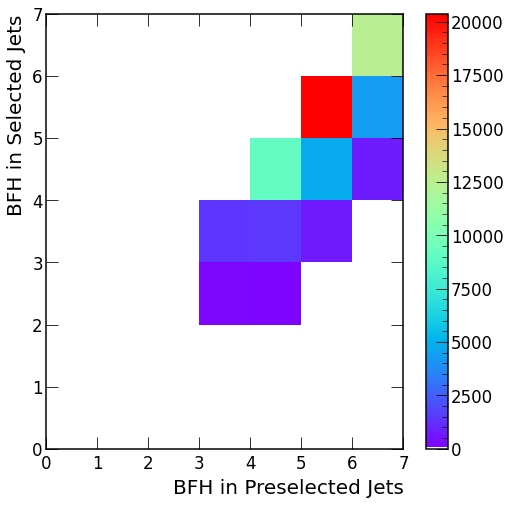

In [ ]:
fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(signal.nfound_presel, signal.nfound_select, bins=np.arange(8), ax=ax)

ax.minorticks_off()

ax.set_xlabel('BFH in Preselected Jets')
ax.set_ylabel('BFH in Selected Jets')

fig.colorbar(im, ax=ax)

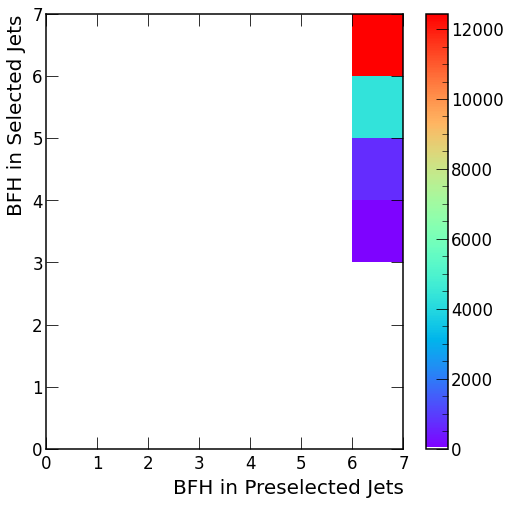

In [121]:
fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(signal.nfound_presel[signal.nfound_presel == 6], signal.nfound_select[signal.nfound_presel == 6], bins=np.arange(8), ax=ax)

ax.minorticks_off()

ax.set_xlabel('BFH in Preselected Jets')
ax.set_ylabel('BFH in Selected Jets')

fig.colorbar(im, ax=ax)

In [ ]:
signal.nfound

array([2985.05920812, 3874.60903553, 1897.54860913, 1423.02499492])

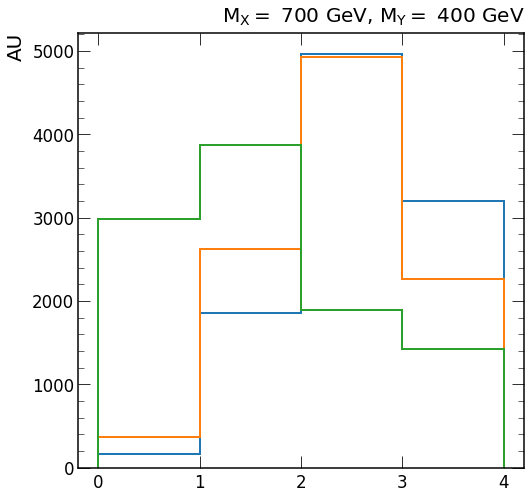

In [120]:
fig, ax = plt.subplots()

signal.hist('nfound_presel_h', bins=np.arange(5), ax=ax)
signal.hist('nfound_select_h', bins=np.arange(5), ax=ax)
signal.hist('nfound_paired_h', bins=np.arange(5), ax=ax)

In [98]:
signal.keys()

['Run',
 'LumiSec',
 'Event',
 'n_other_pv',
 'rhofastjet_all',
 'gen_X_fc_m',
 'gen_X_fc_pt',
 'gen_X_fc_eta',
 'gen_X_fc_phi',
 'gen_X_m',
 'gen_X_pt',
 'gen_X_eta',
 'gen_X_phi',
 'gen_Y_m',
 'gen_Y_pt',
 'gen_Y_eta',
 'gen_Y_phi',
 'gen_HX_m',
 'gen_HX_pt',
 'gen_HX_eta',
 'gen_HX_phi',
 'gen_H1_m',
 'gen_H1_pt',
 'gen_H1_eta',
 'gen_H1_phi',
 'gen_H2_m',
 'gen_H2_pt',
 'gen_H2_eta',
 'gen_H2_phi',
 'gen_HX_b1_m',
 'gen_HX_b1_pt',
 'gen_HX_b1_eta',
 'gen_HX_b1_phi',
 'gen_HX_b2_m',
 'gen_HX_b2_pt',
 'gen_HX_b2_eta',
 'gen_HX_b2_phi',
 'gen_H1_b1_m',
 'gen_H1_b1_pt',
 'gen_H1_b1_eta',
 'gen_H1_b1_phi',
 'gen_H1_b2_m',
 'gen_H1_b2_pt',
 'gen_H1_b2_eta',
 'gen_H1_b2_phi',
 'gen_H2_b1_m',
 'gen_H2_b1_pt',
 'gen_H2_b1_eta',
 'gen_H2_b1_phi',
 'gen_H2_b2_m',
 'gen_H2_b2_pt',
 'gen_H2_b2_eta',
 'gen_H2_b2_phi',
 'gen_HX_b1_genjet_m',
 'gen_HX_b1_genjet_pt',
 'gen_HX_b1_genjet_eta',
 'gen_HX_b1_genjet_phi',
 'gen_HX_b2_genjet_m',
 'gen_HX_b2_genjet_pt',
 'gen_HX_b2_genjet_eta',
 'gen_HX_b2